In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
from IPython.display import Image, display

sns.set(style="ticks", context='poster', font_scale=1.5)
plt.rcParams['font.family'] = 'Helvetica'
%matplotlib inline

attribute_color_map = {
    'A': '#CC0000',
    'B': '#007FFF'
}

In [2]:
from graph_methods import *

In [3]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Wed Sep 24 2025

Python implementation: CPython
Python version       : 3.13.0
IPython version      : 8.28.0

matplotlib: 3.9.2
pandas    : 2.2.3
IPython   : 8.28.0
numpy     : 2.1.2
seaborn   : 0.13.2
networkx  : 3.4.2



# Demo of EcoGT

In this document, we illustrate various component of `graph_methods.py` module. Below, an example
of each topology used in the manuscript is illustrated.


## A) Static graphs

### A-I) The dodecahedron graph

The Platonic dodecahedron graph consists of 20 nodes and 30 edges. In order to embed this graph in
2D, we project it using a [Schlegel diagram](https://en.wikipedia.org/wiki/Schlegel_diagram).

In [9]:
# Specify a Schlegel diagram for a dodecahedron
d_theta = 2*np.pi/5
theta_offset = np.pi/2
angle_offset1 = -0.5
inner1 = [1,0,19,3,2]
angle_offset3 = -1
outer1 = [9,11,17,5,7]
angle_offset2 = -0.5
inner2 = [8,10,18,4,6]
angle_offset4 = -1
outer2 = [13,12,16,15,14]
ring_nodes = [ inner1, inner2, outer1, outer2 ]
angles = [angle_offset1, angle_offset2, angle_offset3, angle_offset4]
radii = np.array([ 1,2,3,5 ])
schlegel_position = {}
for i in range(4):
    r = radii[i]
    nodes = ring_nodes[i]
    theta0 = theta_offset + d_theta * angles[i]

    for inode, node in enumerate(nodes):
        theta = theta0 - inode * d_theta 
        schlegel_position[node] = (r*np.cos(theta), r*np.sin(theta))

We can simulate competition on a dodecahedron using `SC_on_dodec_graph` function.

This function takes two parameters:

+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B: the effect B on
  A)

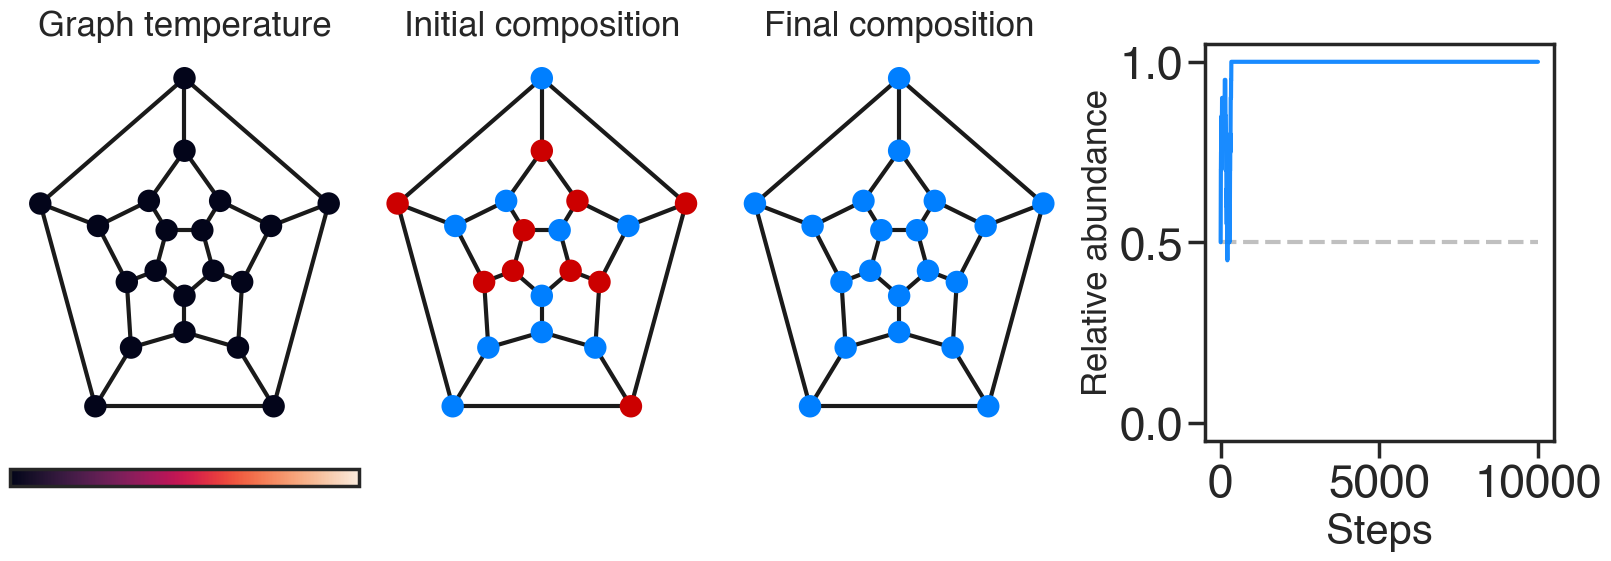

In [19]:
p0, p1, fB = SC_on_dodec_graph(t=10000, alpha = {"A":0.5, "B":0.5})

fig, axes = plt.subplots(1, 4, figsize=(16.,5.5),constrained_layout=True)

axes = axes.flatten()

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=3, with_labels=False, cmap='rocket', pos=schlegel_position, ax=axes[0])

sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))

cbar = fig.colorbar(sm, ax=axes[0], shrink=1, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([])  

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=3, with_labels=False, pos=schlegel_position, ax=axes[1])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=3, with_labels=False, pos=schlegel_position, ax=axes[2])

axes[3].plot(np.array(fB)/20., color=attribute_color_map['B'], alpha=0.9)
axes[3].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[3].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[3].set_xlabel('Steps', fontsize=30)
axes[3].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Graph temperature', fontsize=25)
axes[1].set_title('Initial composition', fontsize=25)
axes[2].set_title('Final composition', fontsize=25);

### A-II) King's graph

[King's graph](https://en.wikipedia.org/wiki/King's_graph) represents the legal moves of the King piece on a
chessboard. `SC_on_kings_graph` function simulates competition on a King's graph. 

This function takes 4 parameters:

+ $N$ : the dimension of the graph. Results in an $N \times N$ graph.
+ $p$ : Probability of adding an edge between two nodes. Defaults to $p=1$ for a king's graph with
  all possible edges.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B: the effect B on
  A)

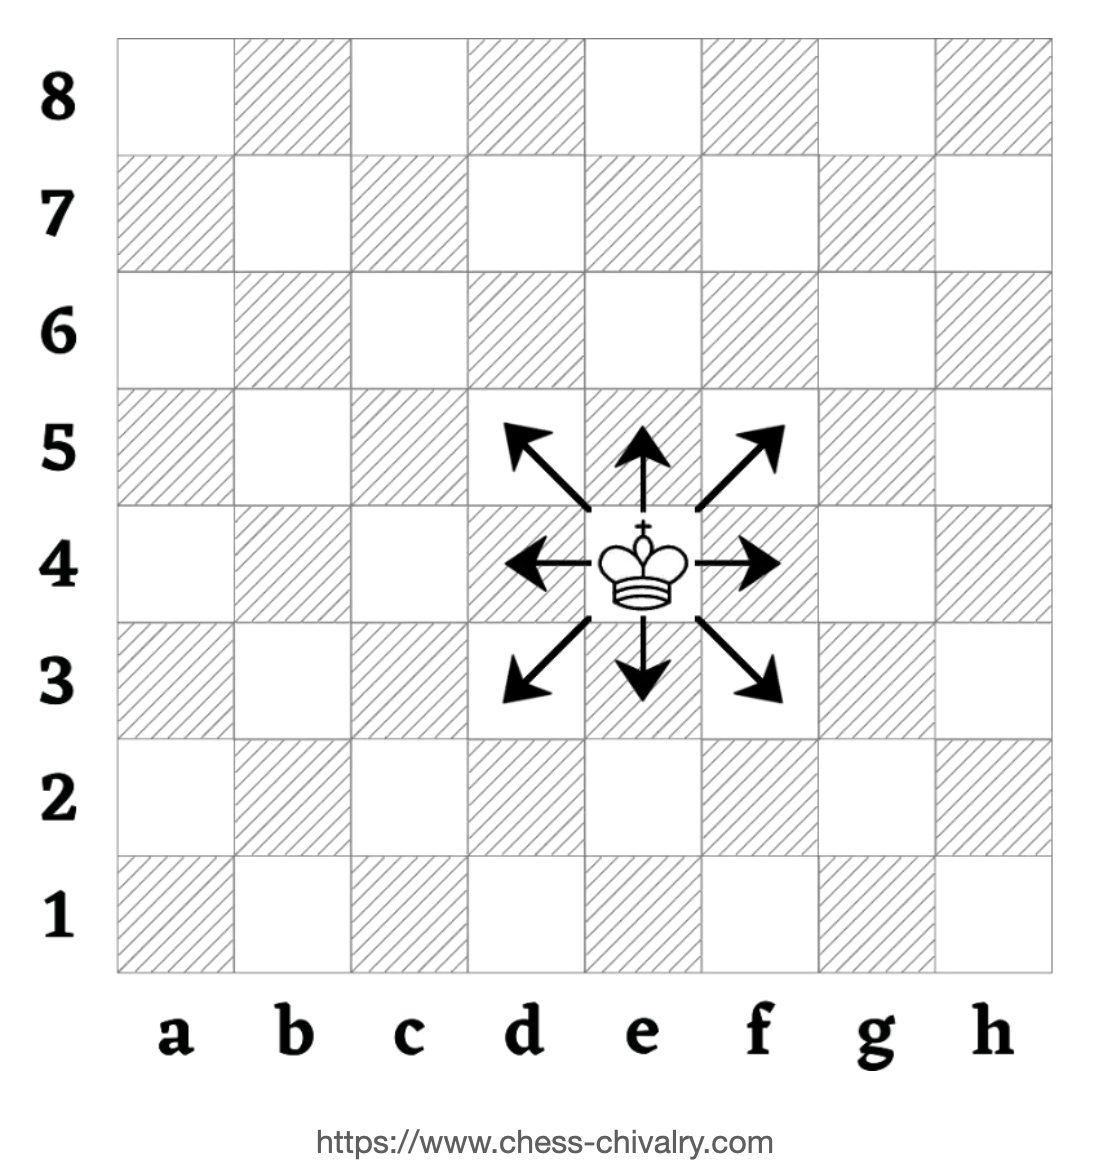

In [56]:
display(Image(filename='./misc/king.png', width=600))

In [20]:
p0, p1, fB = SC_on_kings_graph(N=10, p=1, t=10000, alpha = {"A":0.5, "B":0.5})

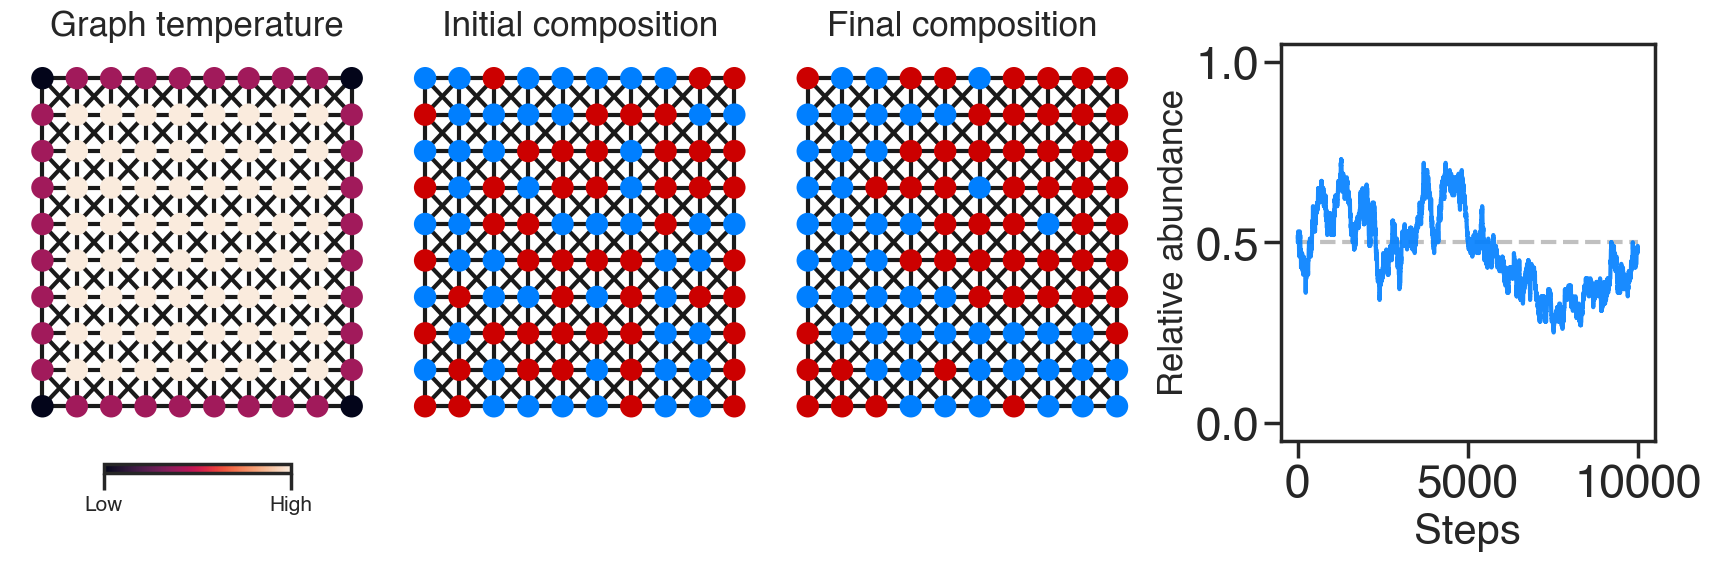

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()

pos = {i:i for i in p0.nodes}

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=3, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])

sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))

cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  # set custom tick labels

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=3, with_labels=False, pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=3, with_labels=False, pos=pos, ax=axes[2])

axes[3].plot(np.array(fB)/100., color=attribute_color_map['B'], alpha=0.9)
axes[3].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[3].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[3].set_xlabel('Steps', fontsize=30)
axes[3].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Graph temperature', fontsize=25)
axes[1].set_title('Initial composition', fontsize=25)
axes[2].set_title('Final composition', fontsize=25);

### A-III) Complete graph

Competition on a complete graph is simulated using `SC_on_comp_graph` function.

This function takes 3 parameters:

+ $N$ : the number of nodes in the graph.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on
  A)

In [23]:
p0, p1, fB = SC_on_comp_graph(N=50, t=5000, alpha = {"A":0.5, "B":0.5})

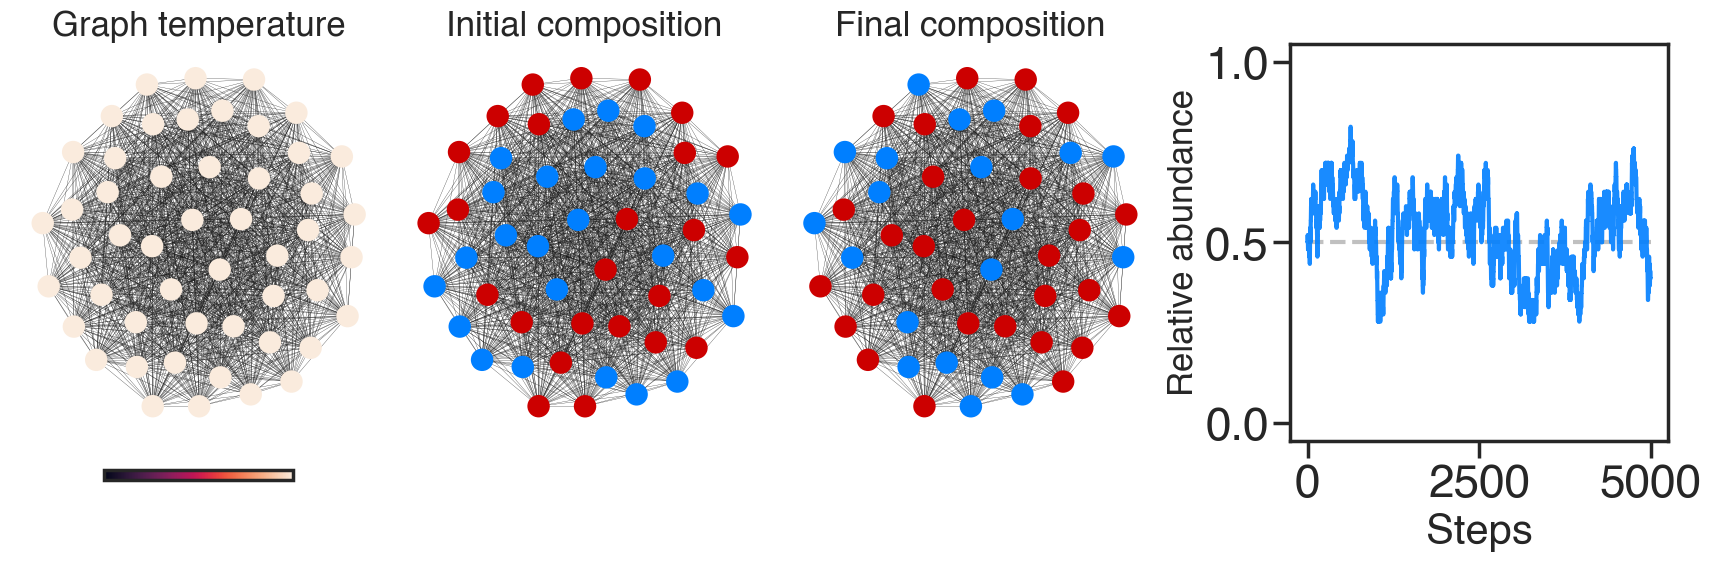

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.2, with_labels=False, cmap='rocket_r', pos=pos, ax=axes[0])

sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=0, vmax=max(node_colors)))

cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([])
node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.2, with_labels=False, pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.2, with_labels=False, pos=pos, ax=axes[2])

axes[3].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[3].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[3].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[3].set_xlabel('Steps', fontsize=30)
axes[3].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Graph temperature', fontsize=25)
axes[1].set_title('Initial composition', fontsize=25)
axes[2].set_title('Final composition', fontsize=25);

### A-IV) ER graph

Competition on a random graph is simulated using `SC_on_ER_graph` function.

This function takes 4 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability for edge creation.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on
  A)

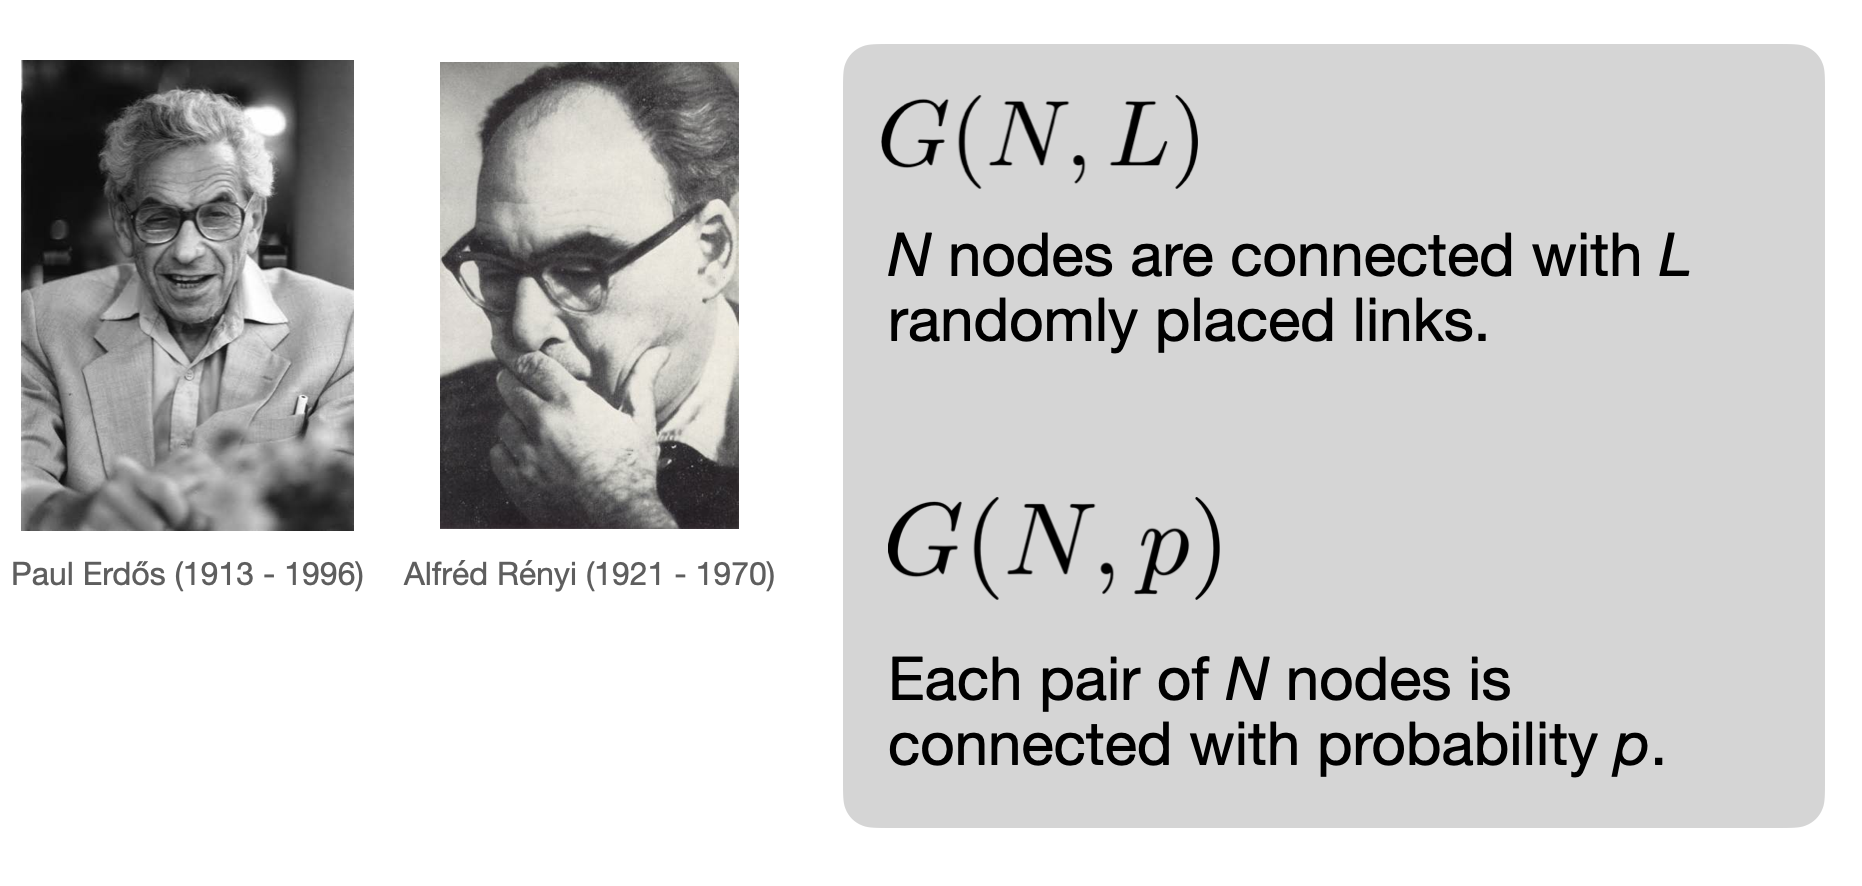

In [51]:
display(Image(filename='./misc/ER_graph.png', width=1000))

In [26]:
p0, p1, fB = SC_on_ER_graph(N=50, p=0.1, t=10000, alpha = {"A":0.5, "B":0.5})

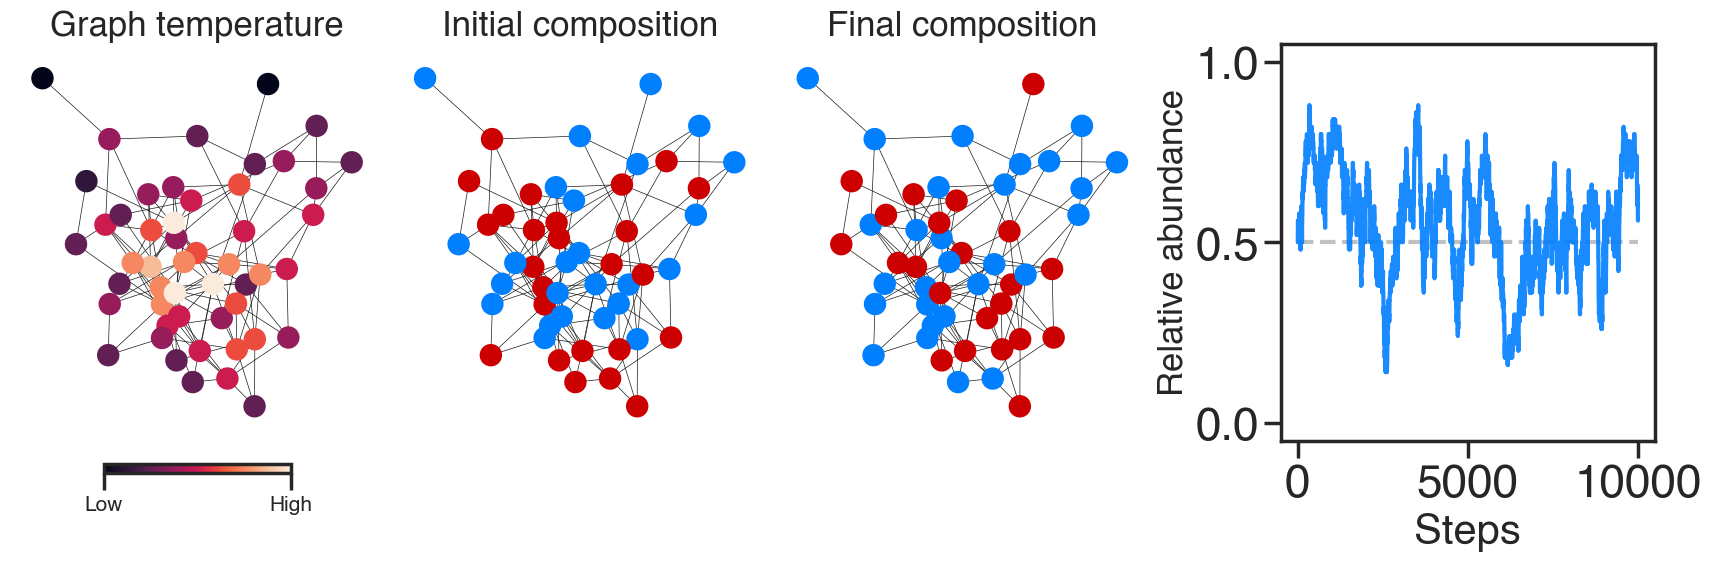

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])

sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))

cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  
node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[2])

axes[3].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[3].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[3].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[3].set_xlabel('Steps', fontsize=30)
axes[3].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Graph temperature', fontsize=25)
axes[1].set_title('Initial composition', fontsize=25)
axes[2].set_title('Final composition', fontsize=25);

### A-V) Small-world graphs

Competition on a graph with small-world properties can be simulated using `C_on_NWSgraph` function,
which creates a Newman-Watts-Strogatz graph.

This function takes 5 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability of adding shortcut edges.
+ $k$: the initial degree of each node.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on
  A)

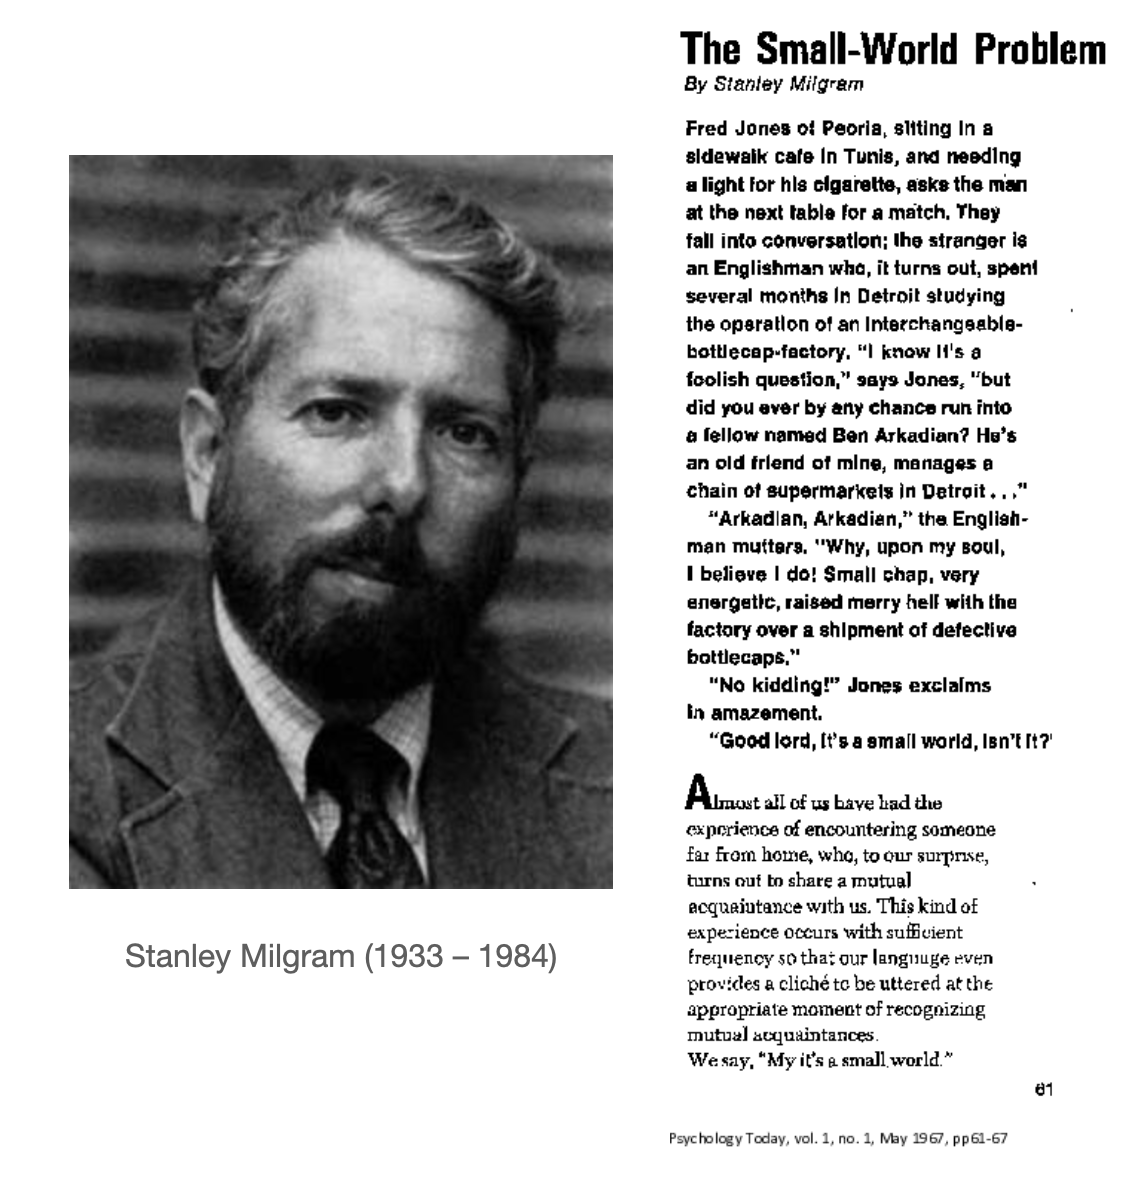

In [54]:
display(Image(filename='./misc/SW.png', width=800))

In [28]:
p0, p1, fB = SC_on_NWSgraph(N=50, p=0.5, k=2, t=5000, alpha = {"A":0.5, "B":0.5})

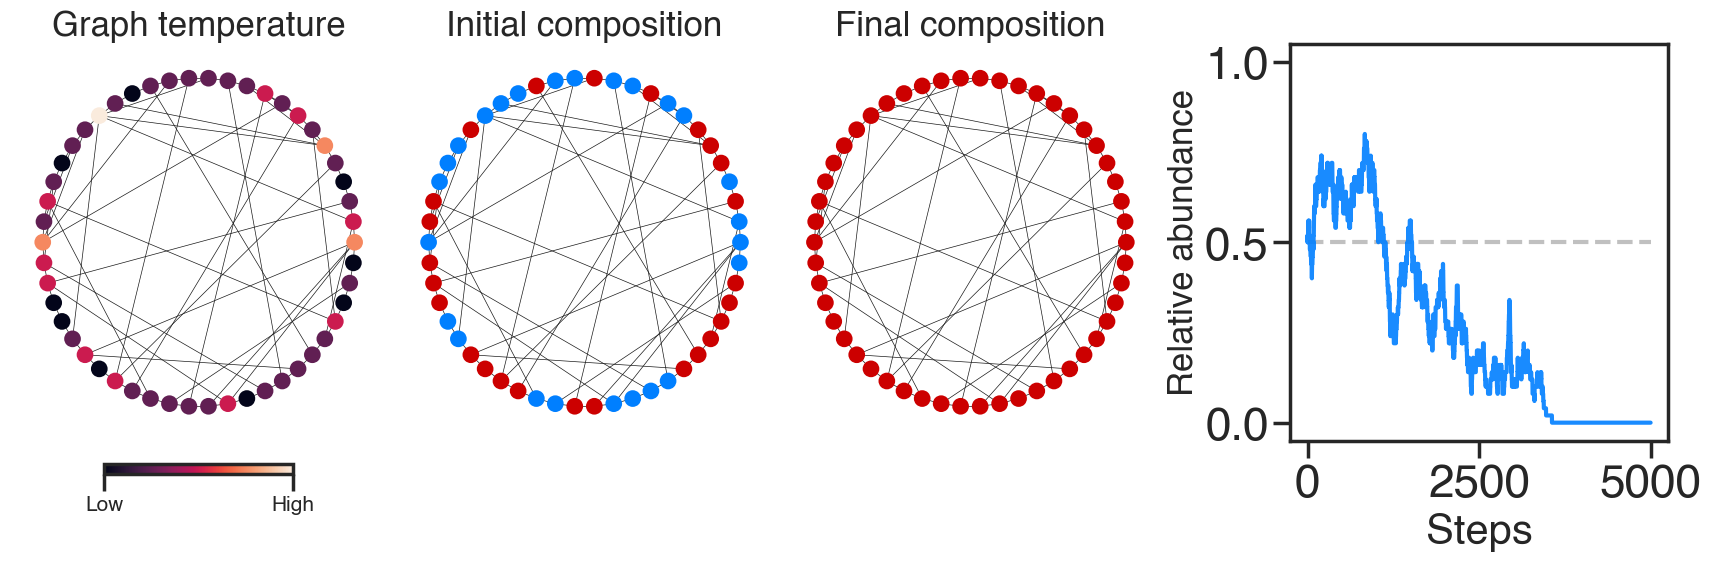

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw_circular(p0, node_color=node_colors, node_size=100, width=0.5, with_labels=False, ax=axes[0])

sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))

cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  
node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw_circular(p0, node_color=node_colors, node_size=100, width=0.5, with_labels=False, ax=axes[1])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw_circular(p1, node_color=node_colors, node_size=100, width=0.5, with_labels=False, ax=axes[2])

axes[3].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[3].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[3].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[3].set_xlabel('Steps', fontsize=30)
axes[3].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Graph temperature', fontsize=25)
axes[1].set_title('Initial composition', fontsize=25)
axes[2].set_title('Final composition', fontsize=25);

### A-VI) Ring graph

Competition on a ring graph can be simulated using `C_on_NWSgraph` function with $p=0$ and $k=2$.

In [30]:
p0, p1, fB = SC_on_NWSgraph(N=50, p=0.0, k=2, t=5000, alpha = {"A":0.5, "B":0.5})

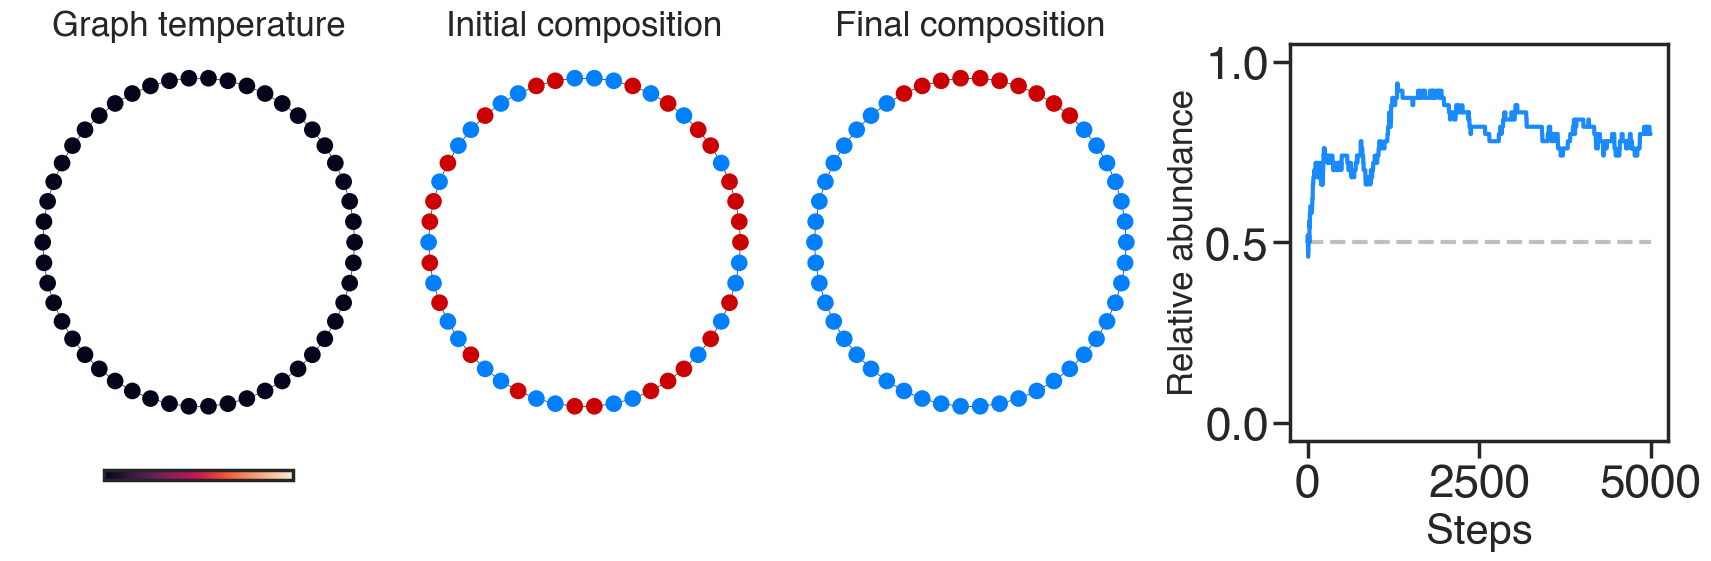

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw_circular(p0, node_color=node_colors, node_size=100, width=0.5, with_labels=False, ax=axes[0])

sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))

cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([]) 
node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw_circular(p0, node_color=node_colors, node_size=100, width=0.5, with_labels=False, ax=axes[1])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw_circular(p1, node_color=node_colors, node_size=100, width=0.5, with_labels=False, ax=axes[2])

axes[3].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[3].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[3].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[3].set_xlabel('Steps', fontsize=30)
axes[3].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Graph temperature', fontsize=25)
axes[1].set_title('Initial composition', fontsize=25)
axes[2].set_title('Final composition', fontsize=25);

## B) Temporal graphs

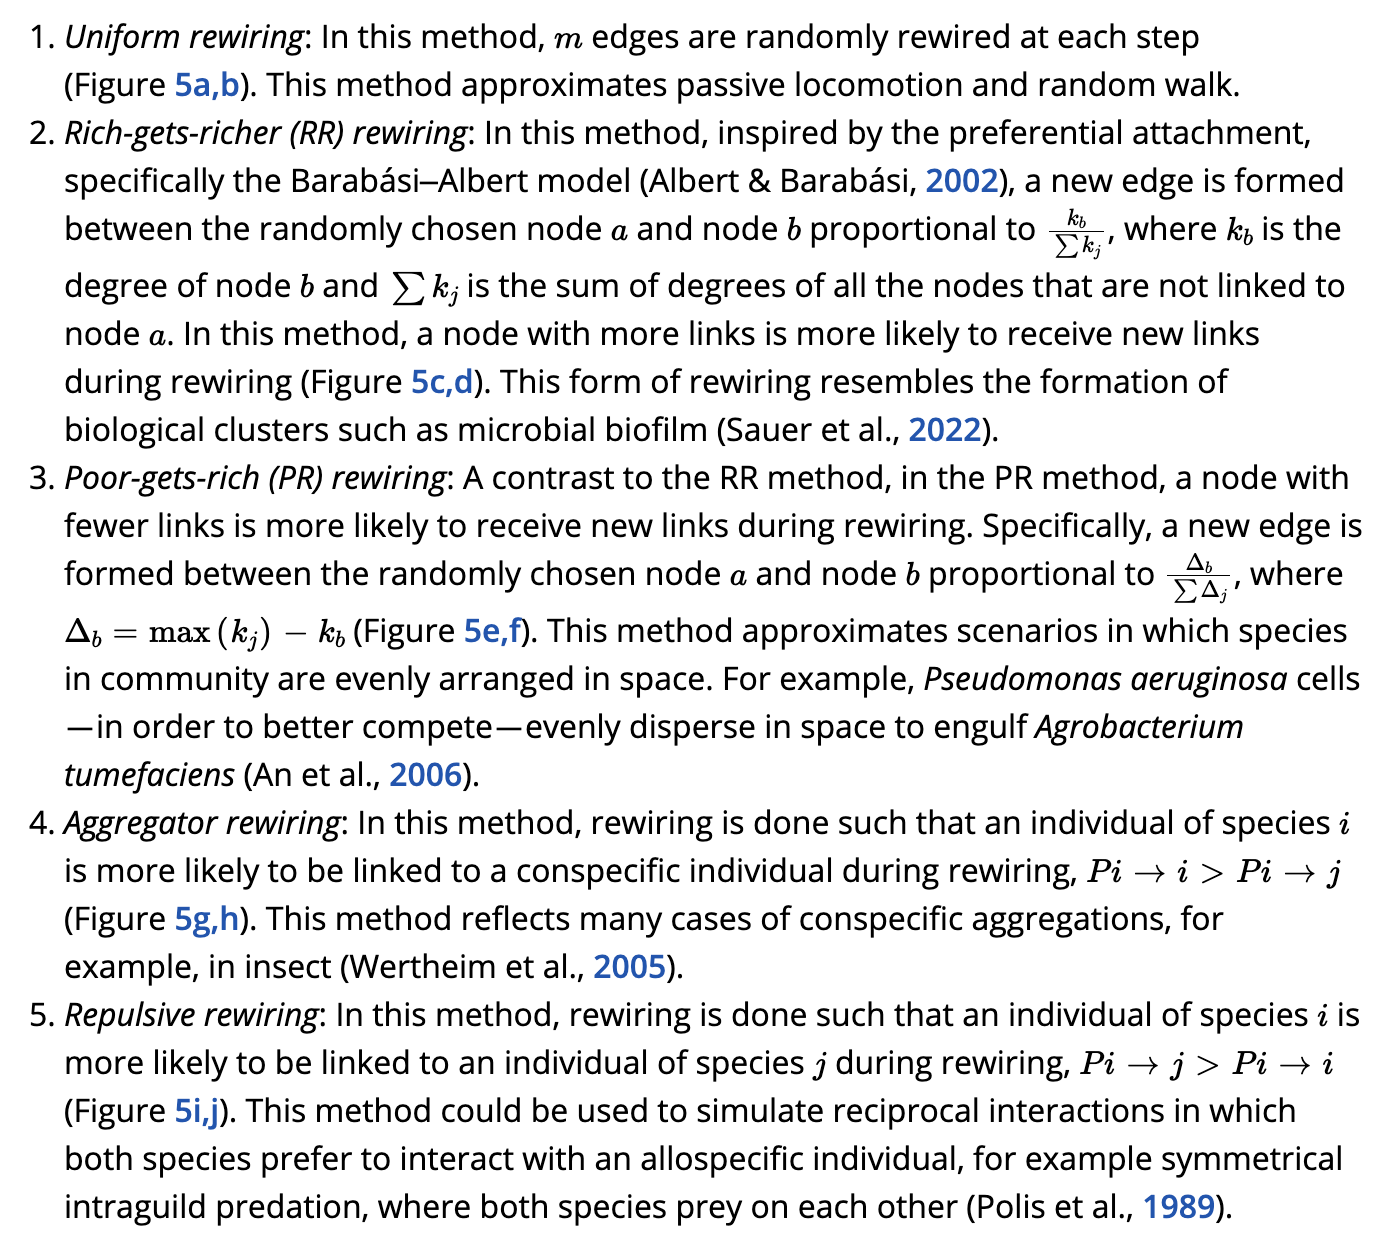

In [57]:
display(Image(filename='./misc/rewiring.png', width=800))

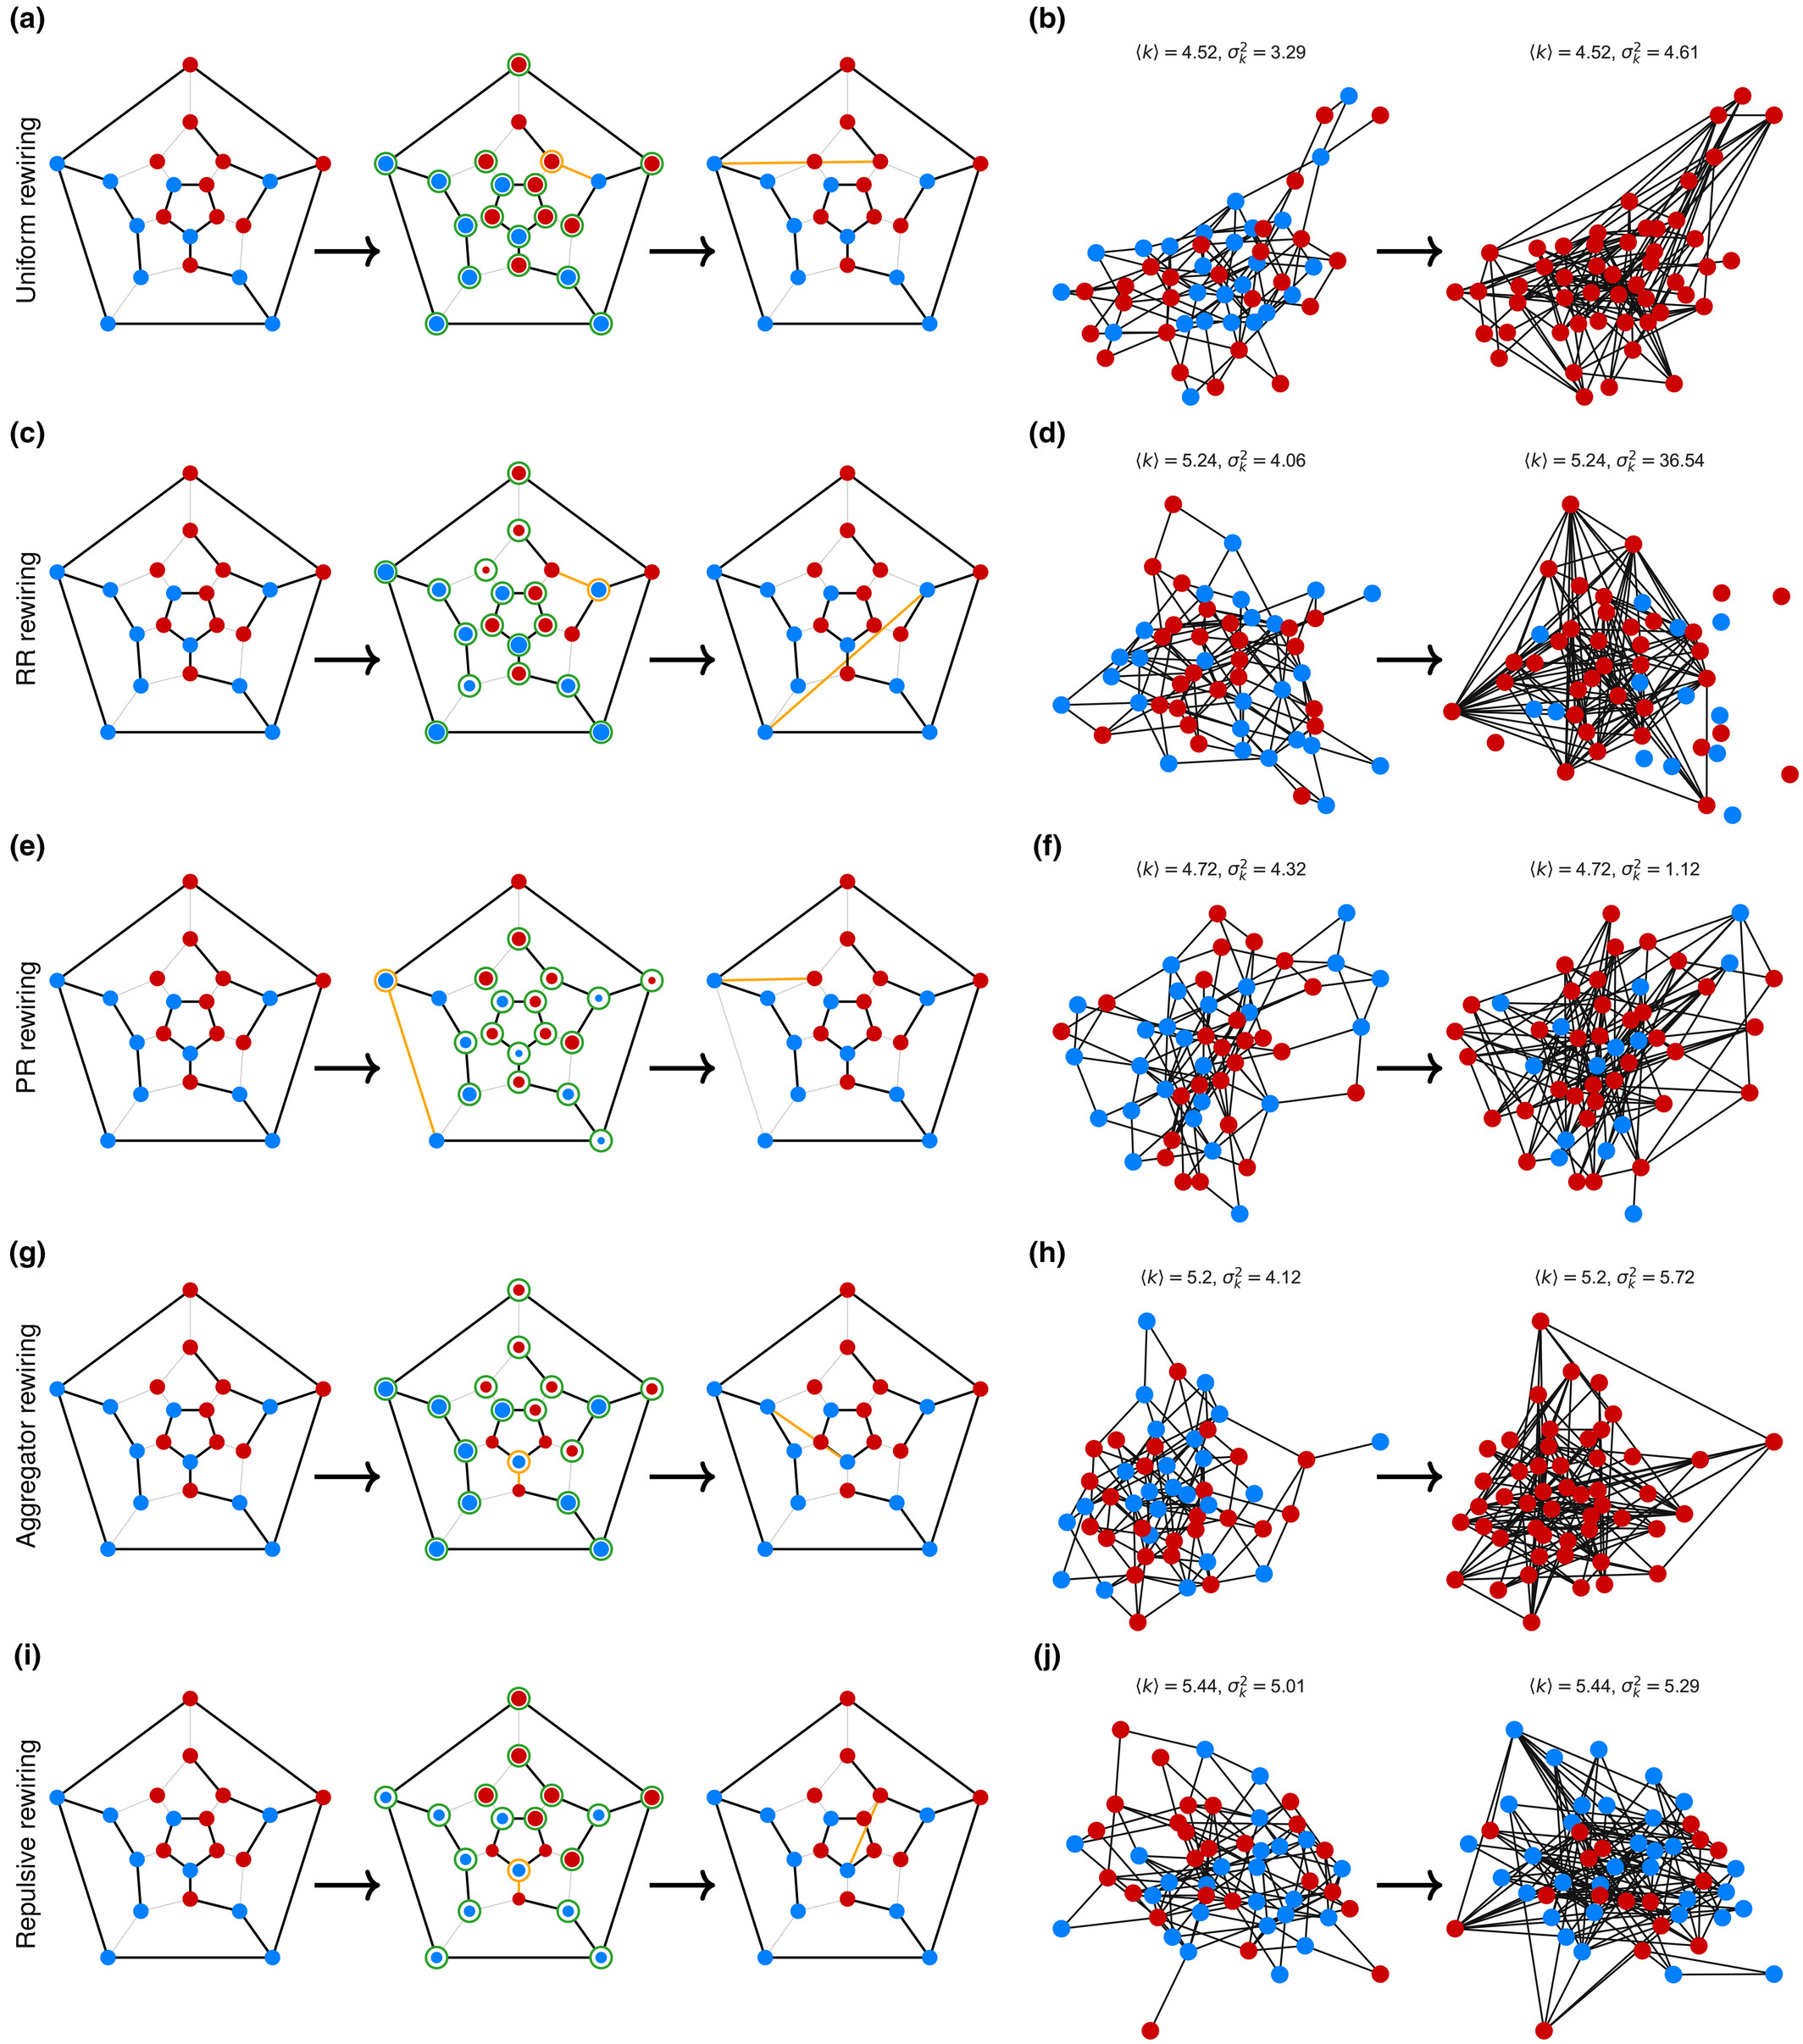

In [4]:
display(Image(filename='./misc/fig5.jpg', width=800))

### B-I) Uniform rewiring

Competition on a graph -- which changes topology following the uniform rewiring algorithm -- is
simulated using `SC_on_ER_graph_with_UR`. The initial
topology is generated using the ER model

This function takes 5 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability of edge creation for the initial topology.
+ $m$: the number of rewired edges per step.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on
  A)

In [32]:
p0, p1, fB = SC_on_ER_graph_with_UR(N=50, p=0.1, m=20, t=5000, alpha = {"A":0.5, "B":0.5})

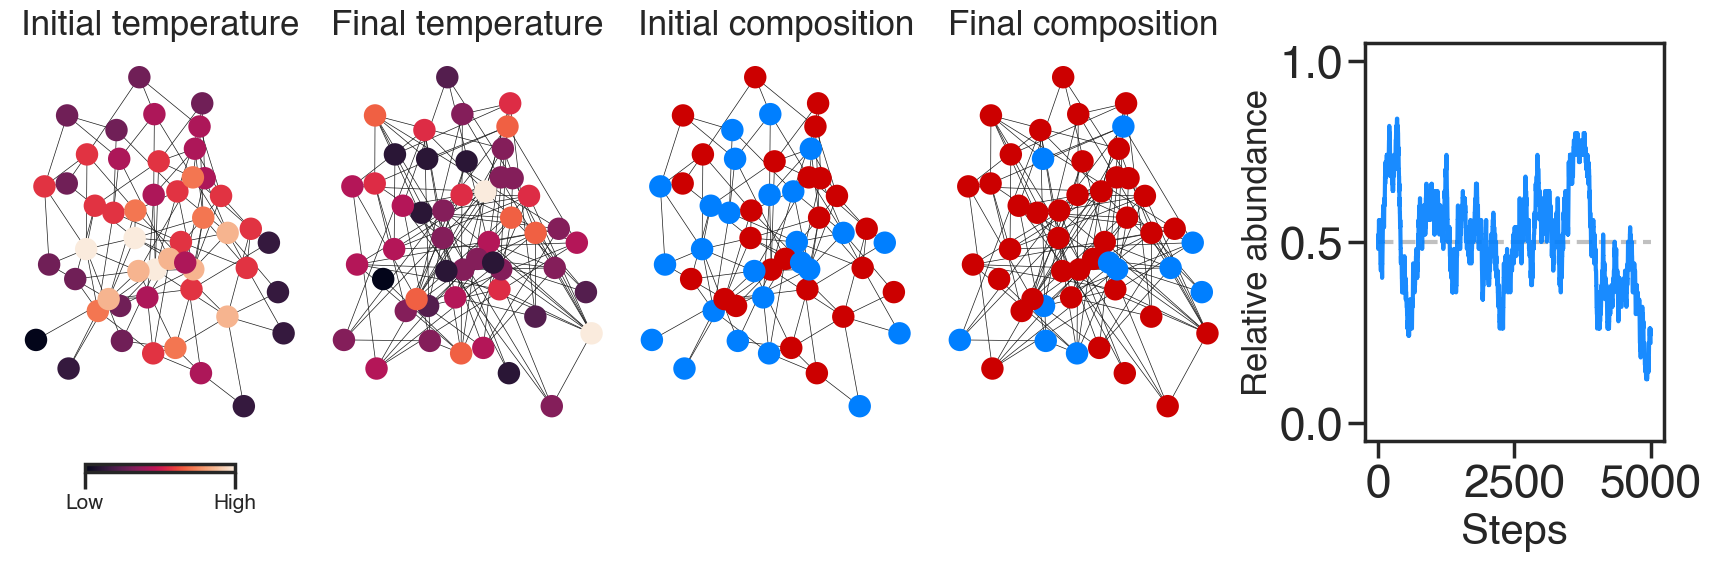

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  

degrees = dict(p1.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[2])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[3])

axes[4].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[4].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[4].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[4].set_xlabel('Steps', fontsize=30)
axes[4].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Initial temperature', fontsize=25)
axes[1].set_title('Final temperature', fontsize=25)
axes[2].set_title('Initial composition', fontsize=25)
axes[3].set_title('Final composition', fontsize=25);

### B-II) RR rewiring

Competition on a graph -- which changes topology following the RR rewiring algorithm -- is
simulated using `SC_on_ER_graph_with_PA` function with `RR_rewire=True`.

This function takes 5 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability of edge creation for the initial topology.
+ $m$: the number of rewired edges per step.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on
  A)

In [34]:
p0, p1, fB = SC_on_ER_graph_with_PA(N=50, p=0.1, m=10, t=5000, alpha = {"A":0.5, "B":0.5},  RR_rewire=True)

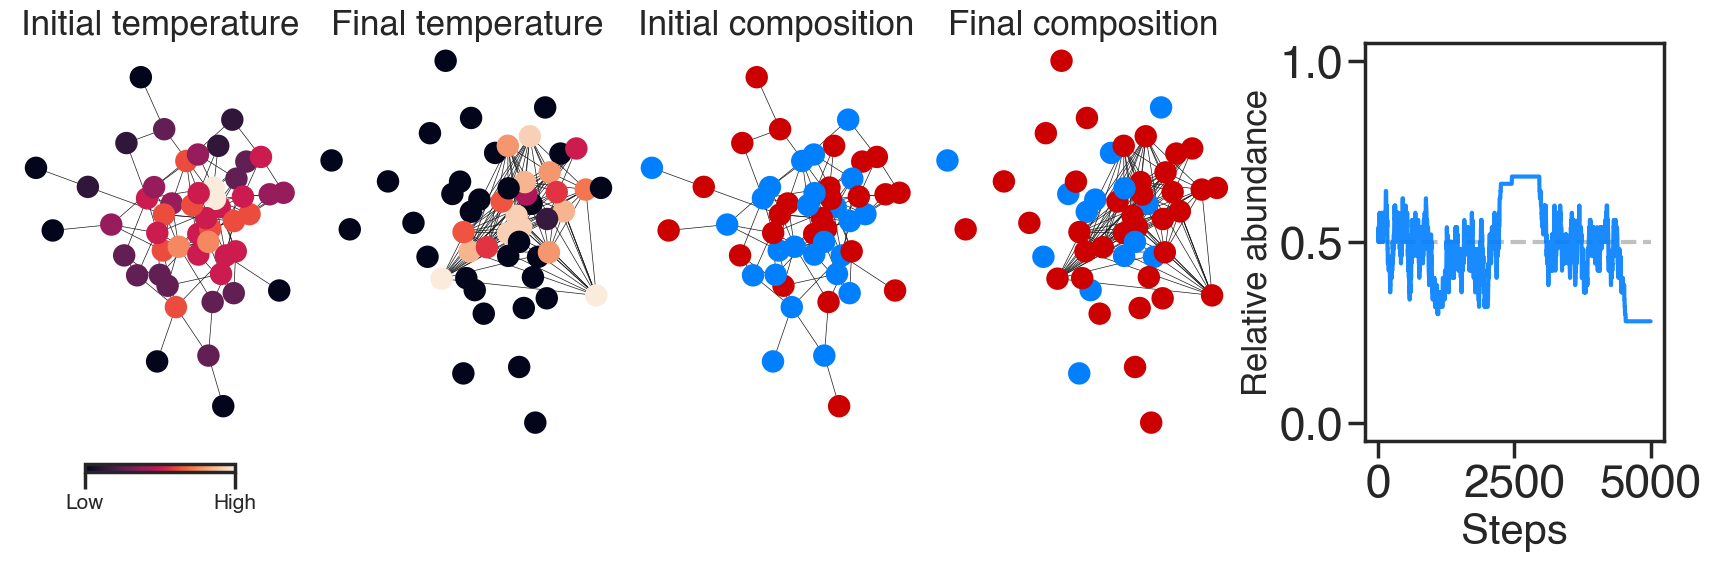

In [35]:
fig, axes = plt.subplots(1, 5, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  

degrees = dict(p1.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[2])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[3])

axes[4].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[4].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[4].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[4].set_xlabel('Steps', fontsize=30)
axes[4].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Initial temperature', fontsize=25)
axes[1].set_title('Final temperature', fontsize=25)
axes[2].set_title('Initial composition', fontsize=25)
axes[3].set_title('Final composition', fontsize=25);

### B-III) PR rewiring

Competition on a graph -- which changes topology following the PR rewiring algorithm -- is
simulated using `SC_on_ER_graph_with_PA` function with `RR_rewire=False`.

This function takes 5 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability of edge creation for the initial topology.
+ $m$: the number of rewired edges per step.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on
  A)

In [36]:
p0, p1, fB = SC_on_ER_graph_with_PA(N=50, p=0.1, m=10, t=5000, alpha = {"A":0.5, "B":0.5},  RR_rewire=False)

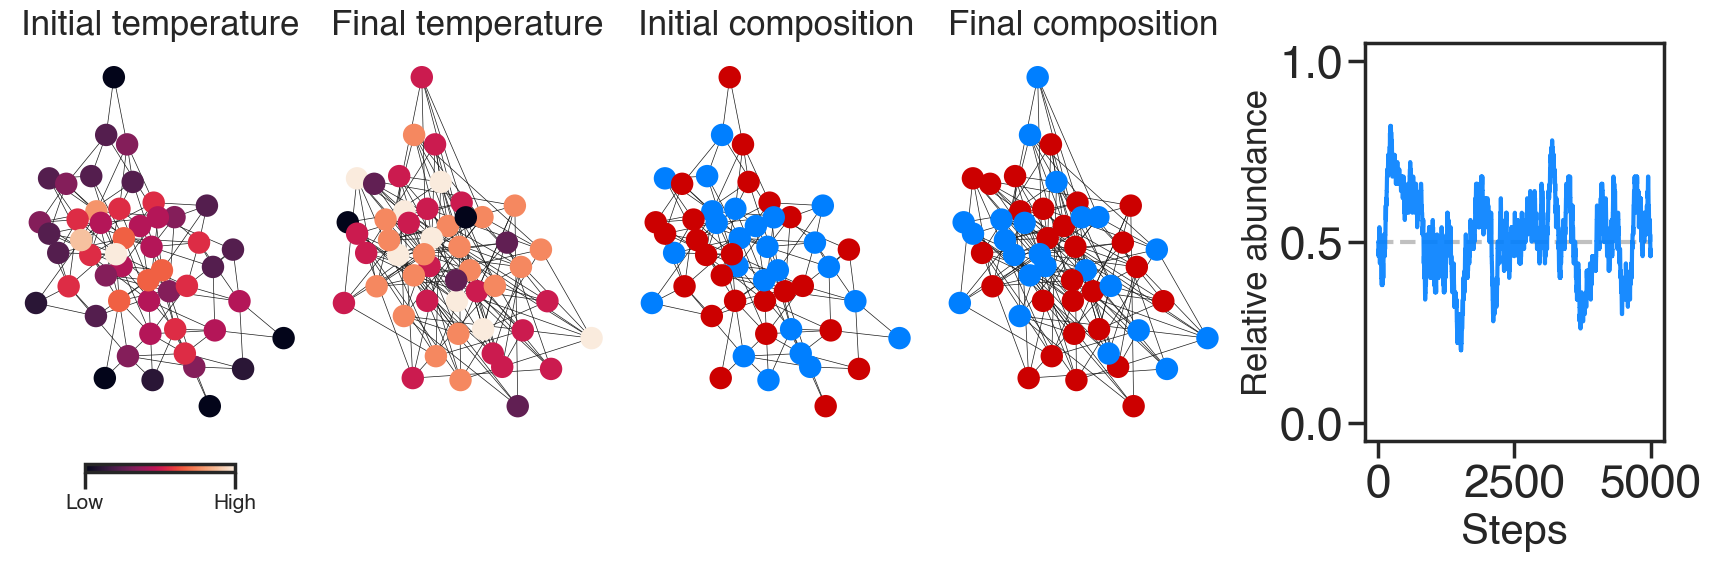

In [37]:
fig, axes = plt.subplots(1, 5, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  

degrees = dict(p1.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[2])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[3])

axes[4].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[4].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[4].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[4].set_xlabel('Steps', fontsize=30)
axes[4].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Initial temperature', fontsize=25)
axes[1].set_title('Final temperature', fontsize=25)
axes[2].set_title('Initial composition', fontsize=25)
axes[3].set_title('Final composition', fontsize=25);

### B-IV) Aggregator rewiring

Competition on a graph -- which changes topology following the Aggregator rewiring algorithm -- is
simulated using `SC_on_ER_graph_agg` function.

This function takes 6 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability of edge creation for the initial topology.
+ $m$: the number of rewired edges per step.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on A)
+ pref: rewiring parameters. For aggregator, {'A':{'A': 4, 'B': 1}, 'B':{'A': 1, 'B': 4}}.

In [38]:
p0, p1, fB = SC_on_ER_graph_agg(N=50, p=0.1, t=5000, m=10, alpha = {"A":0.5, "B":0.5}, pref={'A':{'A': 4, 'B': 1}, 'B':{'A': 1, 'B': 4}})

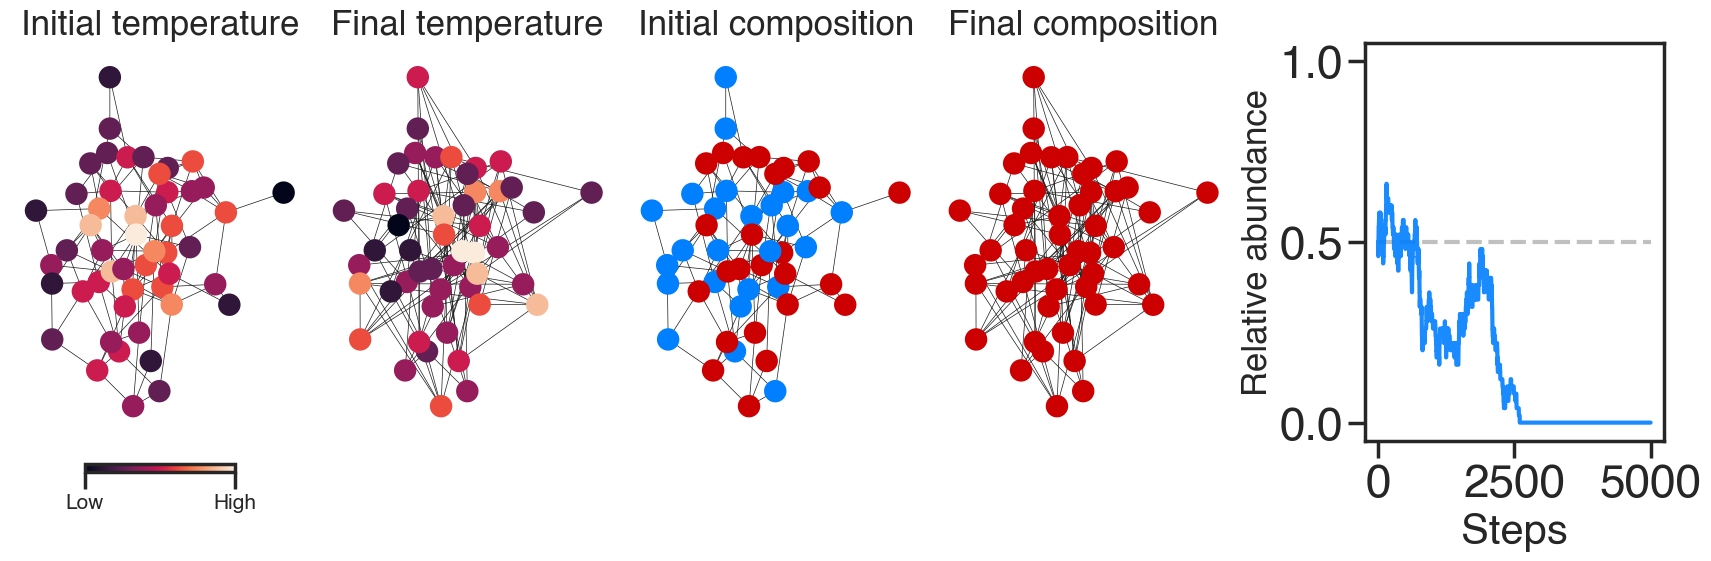

In [39]:
fig, axes = plt.subplots(1, 5, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  

degrees = dict(p1.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[2])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[3])

axes[4].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[4].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[4].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[4].set_xlabel('Steps', fontsize=30)
axes[4].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Initial temperature', fontsize=25)
axes[1].set_title('Final temperature', fontsize=25)
axes[2].set_title('Initial composition', fontsize=25)
axes[3].set_title('Final composition', fontsize=25);

### B-V) Repulsive rewiring

Competition on a graph -- which changes topology following the Repulsive rewiring algorithm -- is
simulated using `SC_on_ER_graph_agg` function.

This function takes 6 parameters:

+ $N$ : the number of nodes in the graph.
+ $p$: probability of edge creation for the initial topology.
+ $m$: the number of rewired edges per step.
+ t : the duration of the simulation (steps)
+ alpha: a dictionary that specifies the competition parameters (A: the effect of species A on B; B:
  the effect B on A)
+ pref: rewiring parameters. For repulsive, {'A':{'A': 1, 'B': 4}, 'B':{'A': 4, 'B': 1}}.

In [40]:
p0, p1, fB = SC_on_ER_graph_agg(N=50, p=0.1, t=5000, m=10, alpha = {"A":0.5, "B":0.5}, pref={'A':{'A': 1, 'B': 4}, 'B':{'A': 4, 'B': 1}})

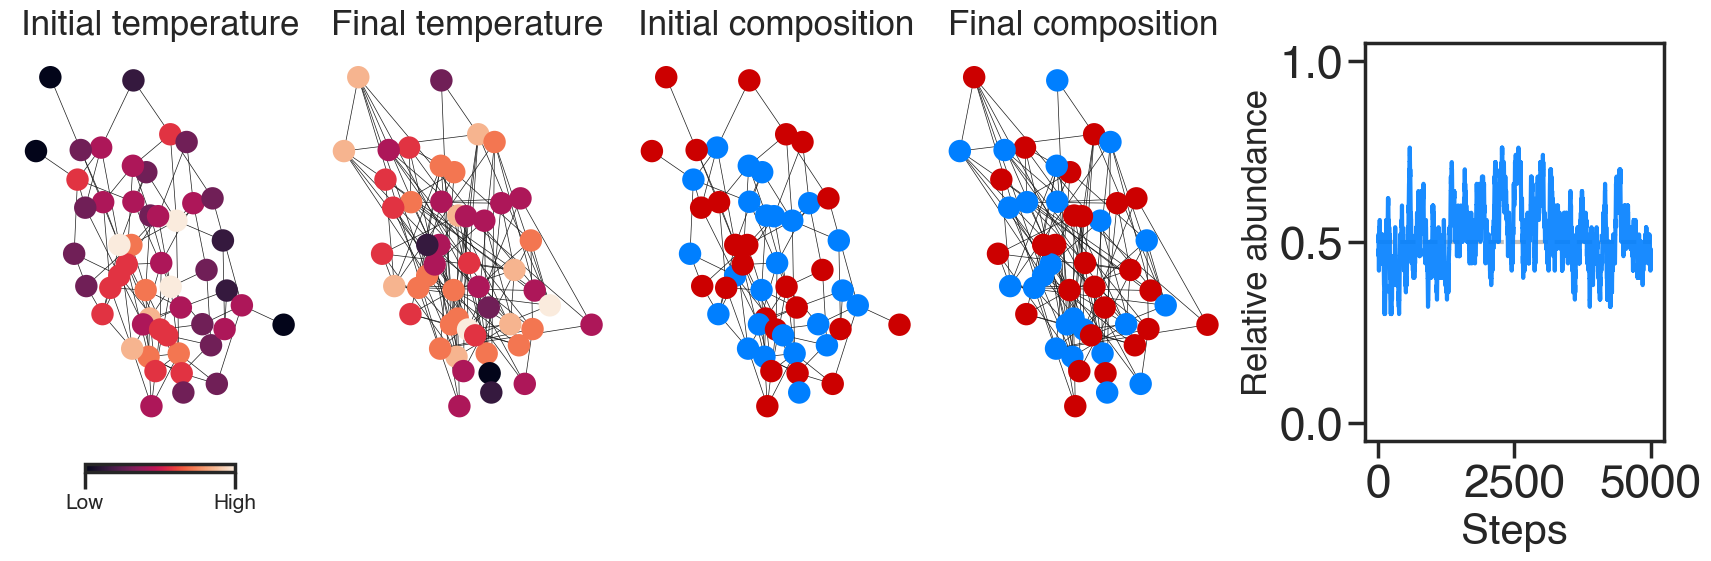

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(17.,5.5),constrained_layout=True)

axes = axes.flatten()
pos = nx.spring_layout(p0)

degrees = dict(p0.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[0])
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
cbar = fig.colorbar(sm, ax=axes[0], shrink=0.5, orientation='horizontal', location='bottom', pad=-0.2)
cbar.set_ticks([np.min(list(degrees.values())), np.max(list(degrees.values()))])  # set custom tick locations
cbar.set_ticklabels(['Low', 'High'], fontsize=15)  

degrees = dict(p1.degree())  # node: degree
node_colors = list(degrees.values())

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, cmap='rocket', pos=pos, ax=axes[1])

node_colors = [attribute_color_map[p0.nodes[node]['Phenotype']] for node in p0.nodes]

nx.draw(p0, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[2])

node_colors = [attribute_color_map[p1.nodes[node]['Phenotype']] for node in p1.nodes]

nx.draw(p1, node_color=node_colors, node_size=200, width=0.5, with_labels=False, pos=pos, ax=axes[3])

axes[4].plot(np.array(fB)/50., color=attribute_color_map['B'], alpha=0.9)
axes[4].set(ylim=(-0.05, 1.05), yticks=np.linspace(0,1, 3), xticks=np.linspace(0, len(fB) - 1, 3))
axes[4].hlines(0.5, 0, len(fB) - 1, ls='dashed', color='silver', zorder=0)
axes[4].set_xlabel('Steps', fontsize=30)
axes[4].set_ylabel('Relative abundance', fontsize=25)
axes[0].set_title('Initial temperature', fontsize=25)
axes[1].set_title('Final temperature', fontsize=25)
axes[2].set_title('Initial composition', fontsize=25)
axes[3].set_title('Final composition', fontsize=25);